In [2]:
import numpy as np
import matplotlib.pyplot as plt


C:\Users\kimchaeyeon\AppData\Local\Temp\ipykernel_32276\1113976525.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.array(x>0 , dtype=np.int)


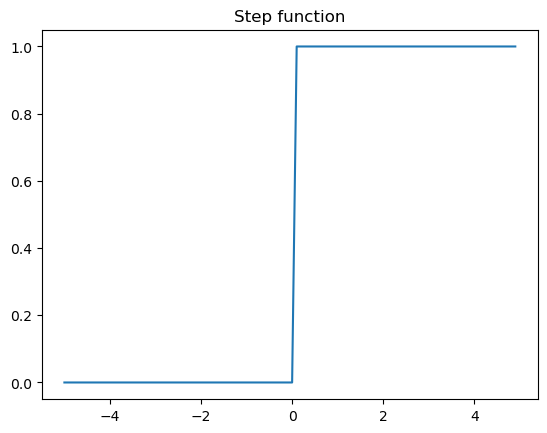

In [3]:
def step(x):
    return np.array(x>0 , dtype=np.int)
x=np.arange(-5.0,5.0,0.1)
y=step(x)

plt.title("Step function")
plt.plot(x,y)
plt.show()

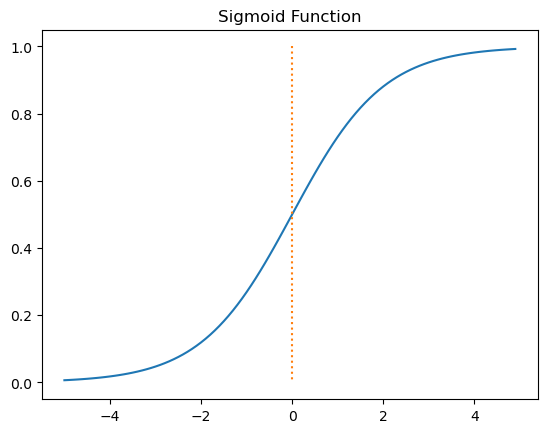

In [5]:
#시그모이드 함수 그래프 그리는 코드
def sigmoid(x):
    return 1/(1+np.exp(-x))

x=np.arange(-5.0,5.0,0.1)
y=sigmoid(x)

plt.plot(x,y)
plt.plot([0,0],[1.0,0.0], ':')
plt.title('Sigmoid Function')
plt.show()

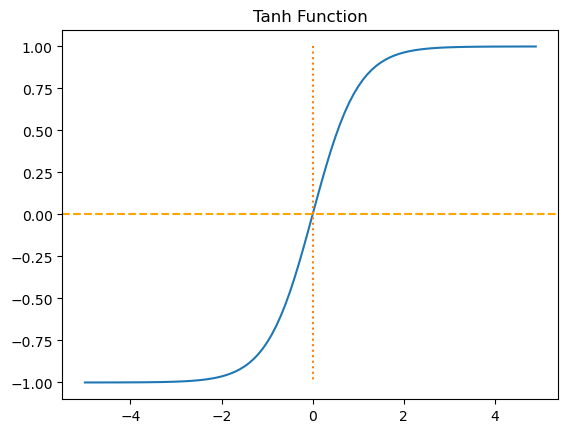

In [6]:
#하이퍼볼릭탄젠트 함수
x=np.arange(-5.0,5.0,0.1)
y=np.tanh(x)

plt.plot(x,y)
plt.plot([0,0],[1.0,-1.0], ':')
plt.axhline(y=0, color='orange' , linestyle='--')
plt.title('Tanh Function')
plt.show()

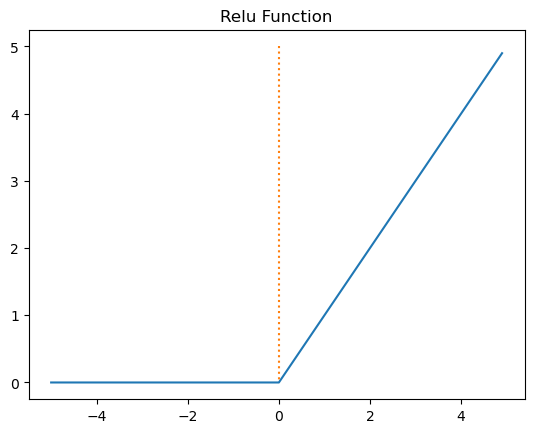

In [7]:
def relu(x):
    return np.maximum(0,x)


x=np.arange(-5.0,5.0,0.1)
y=relu(x)

plt.plot(x,y)
plt.plot([0,0],[5.0,0.0],':')
plt.title('Relu Function')
plt.show()

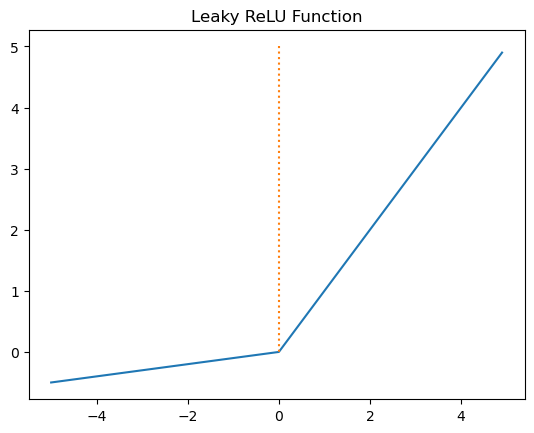

In [10]:
a = 0.1

def leaky_relu(x):
    return np.maximum(a*x, x)

x = np.arange(-5.0, 5.0, 0.1)
y = leaky_relu(x)

plt.plot(x, y)
plt.plot([0,0],[5.0,0.0], ':')
plt.title('Leaky ReLU Function')
plt.show()



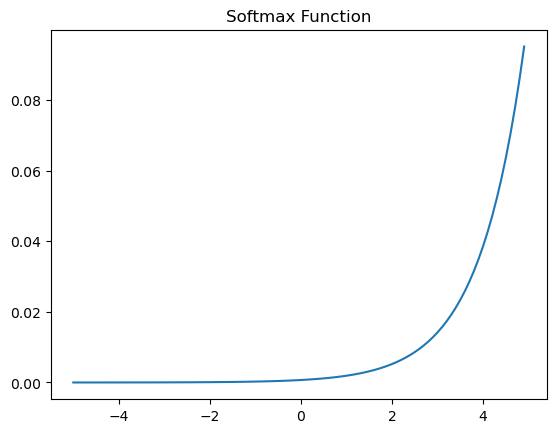

In [11]:
x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성
y = np.exp(x) / np.sum(np.exp(x))

plt.plot(x, y)
plt.title('Softmax Function')
plt.show()

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

# 3개의 입력과 2개의 출력
model.add(Dense(2, input_dim=3, activation='softmax'))


In [13]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 8         
                                                                 
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

# 4개의 입력과 8개의 출력
model.add(Dense(8, input_dim=4, activation='relu'))

# 이어서 8개의 출력
model.add(Dense(8, activation='relu'))

# 이어서 3개의 출력
model.add(Dense(3, activation='softmax'))


In [15]:
model.compile(optimizer='adam', loss='mse', metrics=['mse'])


In [17]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])


In [21]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer='adam', metrics=['acc'])


In [20]:
import tensorflow as tf

In [22]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])


In [23]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=['acc'])


In [25]:
tf.keras.optimizers.SGD(lr=0.01, momentum=0.9)


C:\ana\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [26]:
tf.keras.optimizers.Adagrad(lr=0.01, epsilon=1e-6)


C:\ana\lib\site-packages\keras\optimizers\optimizer_v2\adagrad.py:77: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adagrad, self).__init__(name, **kwargs)


In [27]:
tf.keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-06)


C:\ana\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [28]:
tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)


C:\ana\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [29]:
adam = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['acc'])


In [30]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])


In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense

max_words = 10000
num_classes = 46

model = Sequential()
model.add(Dense(256, input_shape=(max_words,), activation='relu'))
model.add(Dropout(0.5)) # 드롭아웃 추가. 비율은 50%
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5)) # 드롭아웃 추가. 비율은 50%
model.add(Dense(num_classes, activation='softmax'))


In [32]:
from tensorflow.keras import optimizers

Adam = optimizers.Adam(lr=0.0001, clipnorm=1.)


In [33]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
train_text = "The earth is an awesome place live"

# 단어 집합 생성
tokenizer.fit_on_texts([train_text])

# 정수 인코딩
sub_text = "The earth is an great place live"
sequences = tokenizer.texts_to_sequences([sub_text])[0]

print("정수 인코딩 : ",sequences)
print("단어 집합 : ",tokenizer.word_index)


정수 인코딩 :  [1, 2, 3, 4, 6, 7]
단어 집합 :  {'the': 1, 'earth': 2, 'is': 3, 'an': 4, 'awesome': 5, 'place': 6, 'live': 7}


In [34]:
pad_sequences([[1, 2, 3], [3, 4, 5, 6], [7, 8]], maxlen=3, padding='pre')


array([[1, 2, 3],
       [4, 5, 6],
       [0, 7, 8]])

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

In [40]:
model = Sequential()
model.add(Embedding(vocab_size, output_dim, input_length))


NameError: name 'Embedding' is not defined

In [41]:
#keras functioncal APi

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(3, input_dim=4, activation='softmax'))

In [43]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [44]:
inputs = Input(shape=(10,))


In [45]:
inputs = Input(shape=(10,))
hidden1 = Dense(64, activation='relu')(inputs)  # <- 새로 추가
hidden2 = Dense(64, activation='relu')(hidden1) # <- 새로 추가
output = Dense(1, activation='sigmoid')(hidden2) # <- 새로 추가

In [46]:
inputs = Input(shape=(10,))
hidden1 = Dense(64, activation='relu')(inputs)
hidden2 = Dense(64, activation='relu')(hidden1)
output = Dense(1, activation='sigmoid')(hidden2)
model = Model(inputs=inputs, outputs=output) # <- 새로 추가

In [47]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
# model.fit(data, labels)

In [48]:
inputs = Input(shape=(10,))
x = Dense(8, activation="relu")(inputs)
x = Dense(4, activation="relu")(x)
x = Dense(1, activation="linear")(x)
model = Model(inputs, x)


In [49]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model

X = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

inputs = Input(shape=(1,))
output = Dense(1, activation='linear')(inputs)
linear_model = Model(inputs, output)

sgd = optimizers.SGD(lr=0.01)

linear_model.compile(optimizer=sgd, loss='mse', metrics=['mse'])
linear_model.fit(X, y, epochs=300)


Epoch 1/300
1/1 [==============================] - 0s 281ms/step - loss: 3905.1167 - mse: 3905.1167
Epoch 2/300
1/1 [==============================] - 0s 8ms/step - loss: 481.5780 - mse: 481.5780
Epoch 3/300
1/1 [==============================] - 0s 8ms/step - loss: 60.3361 - mse: 60.3361
Epoch 4/300
1/1 [==============================] - 0s 11ms/step - loss: 8.5043 - mse: 8.5043
Epoch 5/300
1/1 [==============================] - 0s 9ms/step - loss: 2.1255 - mse: 2.1255
Epoch 6/300
1/1 [==============================] - 0s 8ms/step - loss: 1.3394 - mse: 1.3394
Epoch 7/300
1/1 [==============================] - 0s 8ms/step - loss: 1.2415 - mse: 1.2415
Epoch 8/300
1/1 [==============================] - 0s 8ms/step - loss: 1.2282 - mse: 1.2282
Epoch 9/300
1/1 [==============================] - 0s 9ms/step - loss: 1.2254 - mse: 1.2254
Epoch 10/300
1/1 [==============================] - 0s 7ms/step - loss: 1.2238 - mse: 1.2238
Epoch 11/300
1/1 [==============================] - 0s 8ms/step 

1/1 [==============================] - 0s 10ms/step - loss: 1.1461 - mse: 1.1461
Epoch 89/300
1/1 [==============================] - 0s 7ms/step - loss: 1.1454 - mse: 1.1454
Epoch 90/300
1/1 [==============================] - 0s 10ms/step - loss: 1.1447 - mse: 1.1447
Epoch 91/300
1/1 [==============================] - 0s 10ms/step - loss: 1.1440 - mse: 1.1440
Epoch 92/300
1/1 [==============================] - 0s 8ms/step - loss: 1.1433 - mse: 1.1433
Epoch 93/300
1/1 [==============================] - 0s 10ms/step - loss: 1.1427 - mse: 1.1427
Epoch 94/300
1/1 [==============================] - 0s 7ms/step - loss: 1.1420 - mse: 1.1420
Epoch 95/300
1/1 [==============================] - 0s 9ms/step - loss: 1.1413 - mse: 1.1413
Epoch 96/300
1/1 [==============================] - 0s 9ms/step - loss: 1.1406 - mse: 1.1406
Epoch 97/300
1/1 [==============================] - 0s 8ms/step - loss: 1.1400 - mse: 1.1400
Epoch 98/300
1/1 [==============================] - 0s 12ms/step - loss: 1.1393

1/1 [==============================] - 0s 6ms/step - loss: 1.1020 - mse: 1.1020
Epoch 176/300
1/1 [==============================] - 0s 5ms/step - loss: 1.1017 - mse: 1.1017
Epoch 177/300
1/1 [==============================] - 0s 6ms/step - loss: 1.1013 - mse: 1.1013
Epoch 178/300
1/1 [==============================] - 0s 6ms/step - loss: 1.1010 - mse: 1.1010
Epoch 179/300
1/1 [==============================] - 0s 7ms/step - loss: 1.1007 - mse: 1.1007
Epoch 180/300
1/1 [==============================] - 0s 5ms/step - loss: 1.1003 - mse: 1.1003
Epoch 181/300
1/1 [==============================] - 0s 6ms/step - loss: 1.1000 - mse: 1.1000
Epoch 182/300
1/1 [==============================] - 0s 7ms/step - loss: 1.0997 - mse: 1.0997
Epoch 183/300
1/1 [==============================] - 0s 8ms/step - loss: 1.0993 - mse: 1.0993
Epoch 184/300
1/1 [==============================] - 0s 8ms/step - loss: 1.0990 - mse: 1.0990
Epoch 185/300
1/1 [==============================] - 0s 6ms/step - loss: 1

1/1 [==============================] - 0s 9ms/step - loss: 1.0805 - mse: 1.0805
Epoch 263/300
1/1 [==============================] - 0s 7ms/step - loss: 1.0803 - mse: 1.0803
Epoch 264/300
1/1 [==============================] - 0s 9ms/step - loss: 1.0801 - mse: 1.0801
Epoch 265/300
1/1 [==============================] - 0s 9ms/step - loss: 1.0800 - mse: 1.0800
Epoch 266/300
1/1 [==============================] - 0s 10ms/step - loss: 1.0798 - mse: 1.0798
Epoch 267/300
1/1 [==============================] - 0s 10ms/step - loss: 1.0796 - mse: 1.0796
Epoch 268/300
1/1 [==============================] - 0s 10ms/step - loss: 1.0795 - mse: 1.0795
Epoch 269/300
1/1 [==============================] - 0s 11ms/step - loss: 1.0793 - mse: 1.0793
Epoch 270/300
1/1 [==============================] - 0s 9ms/step - loss: 1.0792 - mse: 1.0792
Epoch 271/300
1/1 [==============================] - 0s 9ms/step - loss: 1.0790 - mse: 1.0790
Epoch 272/300
1/1 [==============================] - 0s 9ms/step - los

In [50]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

inputs = Input(shape=(3,))
output = Dense(1, activation='sigmoid')(inputs)
logistic_model = Model(inputs, output)


In [51]:
from tensorflow.keras.layers import Input, Dense, concatenate
from tensorflow.keras.models import Model

# 두 개의 입력층을 정의
inputA = Input(shape=(64,))
inputB = Input(shape=(128,))

# 첫번째 입력층으로부터 분기되어 진행되는 인공 신경망을 정의
x = Dense(16, activation="relu")(inputA)
x = Dense(8, activation="relu")(x)
x = Model(inputs=inputA, outputs=x)

# 두번째 입력층으로부터 분기되어 진행되는 인공 신경망을 정의
y = Dense(64, activation="relu")(inputB)
y = Dense(32, activation="relu")(y)
y = Dense(8, activation="relu")(y)
y = Model(inputs=inputB, outputs=y)

# 두개의 인공 신경망의 출력을 연결(concatenate)
result = concatenate([x.output, y.output])

z = Dense(2, activation="relu")(result)
z = Dense(1, activation="linear")(z)

model = Model(inputs=[x.input, y.input], outputs=z)


In [52]:
from tensorflow.keras.layers import Input, Dense, LSTM
from tensorflow.keras.models import Model

inputs = Input(shape=(50,1))
lstm_layer = LSTM(10)(inputs)
x = Dense(10, activation='relu')(lstm_layer)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=output)


In [54]:
import tensorflow as tf


In [55]:
class LinearRegression(tf.keras.Model):
  def __init__(self):
    super(LinearRegression, self).__init__()
    self.linear_layer = tf.keras.layers.Dense(1, input_dim=1, activation='linear')

  def call(self, x):
    y_pred = self.linear_layer(x)

    return y_pred


In [56]:
model = LinearRegression()

In [57]:
X = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적


In [58]:
sgd = tf.keras.optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])
model.fit(X, y, epochs=300)

Epoch 1/300


ValueError: in user code:

    File "C:\ana\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "C:\ana\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\ana\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "C:\ana\lib\site-packages\keras\engine\training.py", line 889, in train_step
        y_pred = self(x, training=True)
    File "C:\ana\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\KIMCHA~1\AppData\Local\Temp\__autograph_generated_filek4rnr1f4.py", line 10, in tf__call
        y_pred = ag__.converted_call(ag__.ld(self).linear_layer, (ag__.ld(x),), None, fscope)

    ValueError: Exception encountered when calling layer "linear_regression" (type LinearRegression).
    
    in user code:
    
        File "C:\Users\kimchaeyeon\AppData\Local\Temp\ipykernel_32276\2984459303.py", line 7, in call  *
            y_pred = self.linear_layer(x)
        File "C:\ana\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler  **
            raise e.with_traceback(filtered_tb) from None
        File "C:\ana\lib\site-packages\keras\engine\input_spec.py", line 228, in assert_input_compatibility
            raise ValueError(f'Input {input_index} of layer "{layer_name}" '
    
        ValueError: Input 0 of layer "dense_29" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    
    
    Call arguments received by layer "linear_regression" (type LinearRegression):
      • x=tf.Tensor(shape=(None,), dtype=int32)


In [59]:
# 선형 회귀 구현 코드의 일부 발췌

inputs = Input(shape=(1,)) # <-- 해당 부분
output = Dense(1, activation='linear')(inputs)
linear_model = Model(inputs, output)

sgd = optimizers.SGD(lr=0.01)

linear_model.compile(optimizer=sgd, loss='mse', metrics=['mse'])
linear_model.fit(X, y, epochs=300)

Epoch 1/300
1/1 [==============================] - 0s 208ms/step - loss: 3467.4214 - mse: 3467.4214
Epoch 2/300
1/1 [==============================] - 0s 9ms/step - loss: 427.6915 - mse: 427.6915
Epoch 3/300
1/1 [==============================] - 0s 7ms/step - loss: 53.6746 - mse: 53.6746
Epoch 4/300
1/1 [==============================] - 0s 6ms/step - loss: 7.6536 - mse: 7.6536
Epoch 5/300
1/1 [==============================] - 0s 14ms/step - loss: 1.9901 - mse: 1.9901
Epoch 6/300
1/1 [==============================] - 0s 7ms/step - loss: 1.2923 - mse: 1.2923
Epoch 7/300
1/1 [==============================] - 0s 12ms/step - loss: 1.2055 - mse: 1.2055
Epoch 8/300
1/1 [==============================] - 0s 10ms/step - loss: 1.1938 - mse: 1.1938
Epoch 9/300
1/1 [==============================] - 0s 9ms/step - loss: 1.1914 - mse: 1.1914
Epoch 10/300
1/1 [==============================] - 0s 9ms/step - loss: 1.1902 - mse: 1.1902
Epoch 11/300
1/1 [==============================] - 0s 13ms/st

1/1 [==============================] - 0s 10ms/step - loss: 1.1284 - mse: 1.1284
Epoch 89/300
1/1 [==============================] - 0s 8ms/step - loss: 1.1279 - mse: 1.1279
Epoch 90/300
1/1 [==============================] - 0s 9ms/step - loss: 1.1273 - mse: 1.1273
Epoch 91/300
1/1 [==============================] - 0s 9ms/step - loss: 1.1268 - mse: 1.1268
Epoch 92/300
1/1 [==============================] - 0s 9ms/step - loss: 1.1262 - mse: 1.1262
Epoch 93/300
1/1 [==============================] - 0s 10ms/step - loss: 1.1257 - mse: 1.1257
Epoch 94/300
1/1 [==============================] - 0s 11ms/step - loss: 1.1251 - mse: 1.1251
Epoch 95/300
1/1 [==============================] - 0s 7ms/step - loss: 1.1246 - mse: 1.1246
Epoch 96/300
1/1 [==============================] - 0s 12ms/step - loss: 1.1241 - mse: 1.1241
Epoch 97/300
1/1 [==============================] - 0s 7ms/step - loss: 1.1235 - mse: 1.1235
Epoch 98/300
1/1 [==============================] - 0s 10ms/step - loss: 1.1230

1/1 [==============================] - 0s 9ms/step - loss: 1.0934 - mse: 1.0934
Epoch 176/300
1/1 [==============================] - 0s 10ms/step - loss: 1.0931 - mse: 1.0931
Epoch 177/300
1/1 [==============================] - 0s 8ms/step - loss: 1.0928 - mse: 1.0928
Epoch 178/300
1/1 [==============================] - 0s 9ms/step - loss: 1.0926 - mse: 1.0926
Epoch 179/300
1/1 [==============================] - 0s 9ms/step - loss: 1.0923 - mse: 1.0923
Epoch 180/300
1/1 [==============================] - 0s 10ms/step - loss: 1.0920 - mse: 1.0920
Epoch 181/300
1/1 [==============================] - 0s 10ms/step - loss: 1.0918 - mse: 1.0918
Epoch 182/300
1/1 [==============================] - 0s 10ms/step - loss: 1.0915 - mse: 1.0915
Epoch 183/300
1/1 [==============================] - 0s 9ms/step - loss: 1.0912 - mse: 1.0912
Epoch 184/300
1/1 [==============================] - 0s 13ms/step - loss: 1.0910 - mse: 1.0910
Epoch 185/300
1/1 [==============================] - 0s 8ms/step - lo

1/1 [==============================] - 0s 6ms/step - loss: 1.0762 - mse: 1.0762
Epoch 263/300
1/1 [==============================] - 0s 6ms/step - loss: 1.0761 - mse: 1.0761
Epoch 264/300
1/1 [==============================] - 0s 5ms/step - loss: 1.0760 - mse: 1.0760
Epoch 265/300
1/1 [==============================] - 0s 9ms/step - loss: 1.0758 - mse: 1.0758
Epoch 266/300
1/1 [==============================] - 0s 9ms/step - loss: 1.0757 - mse: 1.0757
Epoch 267/300
1/1 [==============================] - 0s 8ms/step - loss: 1.0756 - mse: 1.0756
Epoch 268/300
1/1 [==============================] - 0s 9ms/step - loss: 1.0755 - mse: 1.0755
Epoch 269/300
1/1 [==============================] - 0s 8ms/step - loss: 1.0753 - mse: 1.0753
Epoch 270/300
1/1 [==============================] - 0s 7ms/step - loss: 1.0752 - mse: 1.0752
Epoch 271/300
1/1 [==============================] - 0s 9ms/step - loss: 1.0751 - mse: 1.0751
Epoch 272/300
1/1 [==============================] - 0s 8ms/step - loss: 1

In [60]:
#케라스의 texts_to_matrix()

In [61]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer

In [62]:
texts = ['먹고 싶은 사과', '먹고 싶은 바나나', '길고 노란 바나나 바나나', '저는 과일이 좋아요']


In [63]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
print(tokenizer.word_index)

{'바나나': 1, '먹고': 2, '싶은': 3, '사과': 4, '길고': 5, '노란': 6, '저는': 7, '과일이': 8, '좋아요': 9}


In [64]:
print(tokenizer.texts_to_matrix(texts, mode = 'count')) # texts_to_matrix의 입력으로 texts를 넣고, 모드는 'count'


[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


In [65]:
print(tokenizer.texts_to_matrix(texts, mode = 'binary'))

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


In [66]:
print(tokenizer.texts_to_matrix(texts, mode = 'tfidf').round(2)) # 둘째 자리까지 반올림하여 출력

[[0.   0.   0.85 0.85 1.1  0.   0.   0.   0.   0.  ]
 [0.   0.85 0.85 0.85 0.   0.   0.   0.   0.   0.  ]
 [0.   1.43 0.   0.   0.   1.1  1.1  0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.1  1.1  1.1 ]]


In [67]:
print(tokenizer.texts_to_matrix(texts, mode = 'freq').round(2)) # 둘째 자리까지 반올림하여 출력

[[0.   0.   0.33 0.33 0.33 0.   0.   0.   0.   0.  ]
 [0.   0.33 0.33 0.33 0.   0.   0.   0.   0.   0.  ]
 [0.   0.5  0.   0.   0.   0.25 0.25 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.33 0.33 0.33]]


In [68]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

In [69]:
newsdata = fetch_20newsgroups(subset = 'train') # 'train'을 기재하면 훈련 데이터만 리턴한다.


In [70]:
print(newsdata.keys())


dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [71]:
print('훈련용 샘플의 개수 : {}'.format(len(newsdata.data)))

훈련용 샘플의 개수 : 11314


In [72]:
print('총 주제의 개수 : {}'.format(len(newsdata.target_names)))
print(newsdata.target_names)

총 주제의 개수 : 20
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [73]:
print('첫번째 샘플의 레이블 : {}'.format(newsdata.target[0]))

첫번째 샘플의 레이블 : 7


In [74]:
print('7번 레이블이 의미하는 주제 : {}'.format(newsdata.target_names[7]))

7번 레이블이 의미하는 주제 : rec.autos


In [75]:
print(newsdata.data[0]) # 첫번째 샘플 출력

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [76]:
data = pd.DataFrame(newsdata.data, columns = ['email'])
data['target'] = pd.Series(newsdata.target)
data[:5]


,email,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14


In [77]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11314 entries, 0 to 11313
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   11314 non-null  object
 1   target  11314 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 132.7+ KB


In [78]:
data.isnull().values.any()

False

In [79]:
print('중복을 제외한 샘플의 수 : {}'.format(data['email'].nunique()))
print('중복을 제외한 주제의 수 : {}'.format(data['target'].nunique()))

중복을 제외한 샘플의 수 : 11314
중복을 제외한 주제의 수 : 20


In [80]:
print(data.groupby('target').size().reset_index(name='count'))


    target  count
0        0    480
1        1    584
2        2    591
3        3    590
4        4    578
5        5    593
6        6    585
7        7    594
8        8    598
9        9    597
10      10    600
11      11    595
12      12    591
13      13    594
14      14    593
15      15    599
16      16    546
17      17    564
18      18    465
19      19    377


In [81]:
newsdata_test = fetch_20newsgroups(subset='test', shuffle=True)
train_email = data['email']
train_label = data['target']
test_email = newsdata_test.data
test_label = newsdata_test.target

In [83]:
vocab_size = 10000
num_classes = 20

In [85]:
def prepare_data(train_data, test_data, mode): # 전처리 함수
    tokenizer = Tokenizer(num_words = vocab_size) # vocab_size 개수만큼의 단어만 사용한다.
    tokenizer.fit_on_texts(train_data)
    X_train = tokenizer.texts_to_matrix(train_data, mode=mode) # 샘플 수 × vocab_size 크기의 행렬 생성
    X_test = tokenizer.texts_to_matrix(test_data, mode=mode) # 샘플 수 × vocab_size 크기의 행렬 생성
    return X_train, X_test, tokenizer.index_word


In [86]:
X_train, X_test, index_to_word = prepare_data(train_email, test_email, 'binary') # binary 모드로 변환
y_train = to_categorical(train_label, num_classes) # 원-핫 인코딩
y_test = to_categorical(test_label, num_classes) # 원-핫 인코딩


In [87]:
print('훈련 샘플 본문의 크기 : {}'.format(X_train.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(y_train.shape))
print('테스트 샘플 본문의 크기 : {}'.format(X_test.shape))
print('테스트 샘플 레이블의 크기 : {}'.format(y_test.shape))


훈련 샘플 본문의 크기 : (11314, 10000)
훈련 샘플 레이블의 크기 : (11314, 20)
테스트 샘플 본문의 크기 : (7532, 10000)
테스트 샘플 레이블의 크기 : (7532, 20)


In [88]:
print('빈도수 상위 1번 단어 : {}'.format(index_to_word[1]))
print('빈도수 상위 9999번 단어 : {}'.format(index_to_word[9999]))


빈도수 상위 1번 단어 : the
빈도수 상위 9999번 단어 : mic


In [90]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [91]:
def fit_and_evaluate(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(Dense(256, input_shape=(vocab_size,), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.1)
    score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)
    return score[1]


In [ ]:
modes = ['binary', 'count', 'tfidf', 'freq'] # 4개의 모드를 리스트에 저장.

for mode in modes: # 4개의 모드에 대해서 각각 아래의 작업을 반복한다.
    X_train, X_test, _ = prepare_data(train_email, test_email, mode) # 모드에 따라서 데이터를 전처리
    score = fit_and_evaluate(X_train, y_train, X_test, y_test) # 모델을 훈련하고 평가.
    print(mode+' 모드의 테스트 정확도:', score)


Epoch 1/5
80/80 [==============================] - 4s 36ms/step - loss: 2.2879 - accuracy: 0.3388 - val_loss: 0.9654 - val_accuracy: 0.8127
Epoch 2/5
80/80 [==============================] - 2s 24ms/step - loss: 0.8870 - accuracy: 0.7568 - val_loss: 0.4457 - val_accuracy: 0.8949
Epoch 3/5
80/80 [==============================] - 2s 23ms/step - loss: 0.4392 - accuracy: 0.8867 - val_loss: 0.3423 - val_accuracy: 0.9046
Epoch 4/5
80/80 [==============================] - 2s 23ms/step - loss: 0.2681 - accuracy: 0.9324 - val_loss: 0.3108 - val_accuracy: 0.9090
Epoch 5/5
80/80 [==============================] - 2s 22ms/step - loss: 0.1674 - accuracy: 0.9588 - val_loss: 0.2958 - val_accuracy: 0.9125
binary 모드의 테스트 정확도: 0.825809895992279
Epoch 1/5
80/80 [==============================] - 2s 23ms/step - loss: 2.8067 - accuracy: 0.2338 - val_loss: 1.6824 - val_accuracy: 0.7385
Epoch 2/5
80/80 [==============================] - 2s 23ms/step - loss: 1.4332 - accuracy: 0.6254 - val_loss: 0.7022 - val